<a href="https://colab.research.google.com/github/JMR1022/Capstone_project/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

## Original Dataframe

In [3]:
original_df = pd.read_csv("/content/drive/MyDrive/Capstone Project/Iowa_Liquor_Sales.csv", dtype='unicode')

In [4]:
pd.options.display.max_columns = None #showing all columns in df
pd.options.mode.chained_assignment = None #allowing one action to be long

In [5]:
original_df['Date'] = pd.to_datetime(original_df['Date']) #making date a date type

In [6]:
original_df['Month'] = pd.DatetimeIndex(original_df['Date']).month #adding a column for the month

In [7]:
original_df['Year'] = pd.DatetimeIndex(original_df['Date']).year # adding a column for the year

In [ ]:
original_df.columns = original_df.columns.str.replace(' ', '_') #replacing all spaces with _ in column names

In [9]:
original_df.Category_Name = original_df.Category_Name.str.upper()#making all values in Category Name Upper case

### Narrowing Dataframe down to most populous county

In [ ]:
one_county_df = original_df[(original_df['County'] == 'Polk')] #filtering for all rows containing Polk for the county

In [ ]:
one_county_df.Category_Name.unique() #checking all categories

In [12]:
one_county_df['Broad_Category'] = np.where(one_county_df.Category_Name.str.contains("VODKA"), 'Vodka',
                                         np.where(one_county_df.Category_Name.str.contains('TEQUILA'), 'Tequila', 
                                         np.where(one_county_df.Category_Name.str.contains('WHISK'), 'Whiskey', 
                                         np.where(one_county_df.Category_Name.str.contains('BRANDIES'), 'Brandies', 
                                         np.where(one_county_df.Category_Name.str.contains('GIN'), 'Gin', 
                                         np.where(one_county_df.Category_Name.str.contains('RUM'), 'Rum', 
                                         np.where(one_county_df.Category_Name.str.contains('COCKTAILS'), 'Cocktials', 
                                         np.where(one_county_df.Category_Name.str.contains('SCHNAPPS'), 'Schnapps', 
                                         np.where(one_county_df.Category_Name.str.contains('COFFEE'), 'Coffee Liqueurs', 
                                         np.where(one_county_df.Category_Name.str.contains('AMARETTO'), 'Amaretto', 
                                         np.where(one_county_df.Category_Name.str.contains('SPIRITS'), 'Other Spirits', 
                                         np.where(one_county_df.Category_Name.str.contains('SCOTCH'), 'Scotch', 
                                         np.where(one_county_df.Category_Name.str.contains('ALCOHOL'), 'Other Spirits', 
                                         np.where(one_county_df.Category_Name.str.contains('CORDIALS & LIQUEUR'), 'Cordial & Liqueur', 
                                         np.where(one_county_df.Category_Name.str.contains('CREME'), 'Creme', 
                                         np.where(one_county_df.Category_Name.str.contains('TRIPLE SEC'), 'Triple Sec', 
                                         np.where(one_county_df.Category_Name.str.contains('ANISETTE'), 'Other Spirits', 
                                         np.where(one_county_df.Category_Name.str.contains('nan'), 'Other Spirits', 
                                         np.where(one_county_df.Category_Name.str.contains('SPECIALTY'), 'Spirit Speciality', 
                                         np.where(one_county_df.Category_Name.str.contains('BEER'), 'Beer', 'Other Spirits')))))))))))))))))))) #creating a new column to group categories

## Narrowing down to 2020-2021

In [ ]:
two_year_span_df = one_county_df[(one_county_df['Year']== 2020) | (one_county_df['Year'] == 2021) ] #new data frame for years 2020 and 2021

In [ ]:
np.sort(two_year_span_df['Store_Name'].str.upper().unique()) #finding all stores in Polk County 

In [ ]:
two_year_span_df.Store_Name = two_year_span_df.Store_Name.str.upper() #making all Store names Upper case

In [ ]:
two_year_span_df['Store_Chains'] = np.where(two_year_span_df.Store_Name.str.contains("CASEY"), 'Casey\'s General Store',
                                            np.where(two_year_span_df.Store_Name.str.contains('FAREWAY'), 'Fareway Stores', 
                                            np.where(two_year_span_df.Store_Name.str.contains('HY-VEE'), 'Hy-Vee', 
                                            np.where(two_year_span_df.Store_Name.str.contains('KUM'), 'Kum & Go', 
                                            np.where(two_year_span_df.Store_Name.str.contains('QUIK'), 'Quik Trip', 
                                            np.where(two_year_span_df.Store_Name.str.contains('SAM\'S'), 'Sam\'s Club', 
                                            np.where(two_year_span_df.Store_Name.str.contains('SUPER QUICK'), 'Super Quick', 
                                            np.where(two_year_span_df.Store_Name.str.contains('TARGET'), 'Target',
                                            np.where(two_year_span_df.Store_Name.str.contains("WAL-MART"), 'Wal-Mart', 'Other'))))))))) #Grouping together individual store into chains

In [ ]:
two_year_span_df['Month'] = two_year_span_df['Month'].astype('int') #changing Month column to int type

In [ ]:
def quarter(m):
  if m >= 10:
    return 'Q4'
  elif ((m < 10) & (m >= 7)):
    return 'Q3'
  elif ((m < 7) & (m >= 4)):
    return 'Q2'
  elif (m < 4):
    return 'Q1'
  else:
    return 'Other'        # defining a function to categorize quarters

In [19]:
two_year_span_df['Quarters'] = two_year_span_df.Month.apply(lambda row: quarter(row)) # adding quarters column 

In [20]:
two_year_span_df['Quarters'].value_counts()

Q3    18769
Q2    18754
Q4    18373
Q1    15978
Name: Quarters, dtype: int64

In [21]:
two_year_span_df['Sale_(Dollars)'] = two_year_span_df['Sale_(Dollars)'].astype(float) 
two_year_span_df['State_Bottle_Cost'] = two_year_span_df['State_Bottle_Cost'].astype(float)
two_year_span_df['State_Bottle_Retail'] = two_year_span_df['State_Bottle_Retail'].astype(float)
two_year_span_df['Bottles_Sold'] = two_year_span_df['Bottles_Sold'].astype(int)       
two_year_span_df['Volume_Sold_(Liters)'] = two_year_span_df['Volume_Sold_(Liters)'].astype(float)      #changing types

In [22]:
two_year_span_df['Gross_Profit'] = (two_year_span_df['State_Bottle_Retail'] - two_year_span_df['State_Bottle_Cost']) * two_year_span_df['Bottles_Sold'] #Finding Gross profit per transaction

In [23]:
two_year_span_df['Dollars_per_Liter'] = (two_year_span_df['Gross_Profit'] / two_year_span_df['Volume_Sold_(Liters)']).round(2) #Finding gross profit per liter sold

In [24]:
two_year_span_df.head()

,Invoice/Item_Number,Date,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Category,Category_Name,Vendor_Number,Vendor_Name,Item_Number,Item_Description,Pack,Bottle_Volume_(ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_(Dollars),Volume_Sold_(Liters),Volume_Sold_(Gallons),Month,Year,Broad_Category,Store_Chains,Quarters,Gross_Profit,Dollars_per_Liter
15620963,INV-24422200102,2020-01-08,2620,HY-VEE / WINDSOR HEIGHTS,7101 University Ave,Windsor Heights,50311,NaN,77,Polk,1081200,CREAM LIQUEURS,305,Mhw LTD,73055,Rumchata,12,750,13.00,19.50,12,234.00,9.0,2.37,1,2020,Other Spirits,Hy-Vee,Q1,78.00,8.67
15621011,INV-24293500009,2020-01-02,2620,HY-VEE / WINDSOR HEIGHTS,7101 University Ave,Windsor Heights,50311,NaN,77,Polk,1011100,BLENDED WHISKIES,492,WESTERN SPIRITS BEVERAGE,27433,Bird Dog Peach,6,750,10.00,15.00,6,90.00,4.5,1.18,1,2020,Whiskey,Hy-Vee,Q1,30.00,6.67
15621062,INV-24293500024,2020-01-02,2620,HY-VEE / WINDSOR HEIGHTS,7101 University Ave,Windsor Heights,50311,NaN,77,Polk,1062100,GOLD RUM,389,REMY COINTREAU USA INC,42666,Mt Gay Eclipse Rum,12,750,10.48,15.72,12,179.64,9.0,2.37,1,2020,Rum,Hy-Vee,Q1,62.88,6.99
15621076,INV-24293600071,2020-01-02,2620,HY-VEE / WINDSOR HEIGHTS,7101 University Ave,Windsor Heights,50311,NaN,77,Polk,1051100,AMERICAN BRANDIES,055,SAZERAC NORTH AMERICA,55066,Mr Boston Blackberry Brandy,12,750,4.17,6.26,12,75.12,9.0,2.37,1,2020,Brandies,Hy-Vee,Q1,25.08,2.79
15621121,INV-24293600029,2020-01-02,2620,HY-VEE / WINDSOR HEIGHTS,7101 University Ave,Windsor Heights,50311,NaN,77,Polk,1041100,AMERICAN DRY GINS,434,LUXCO INC,30528,Hawkeye Gin,6,1750,7.17,10.76,6,64.56,10.5,2.77,1,2020,Gin,Hy-Vee,Q1,21.54,2.05


## Exploring the Data

In [25]:
transaction_count = two_year_span_df['Broad_Category'].value_counts().reset_index() # finding out which liquor has the most transactions

transaction_count


,index,Broad_Category
0,Whiskey,22937
1,Vodka,18195
2,Rum,6633
3,Tequila,4246
4,Cordial & Liqueur,3360
5,Cocktials,2825
6,Brandies,2690
7,Gin,2536
8,Schnapps,2441
9,Other Spirits,2400


Text(0.5, 1.0, 'Market Share of Liquor Transactions in Polk County')

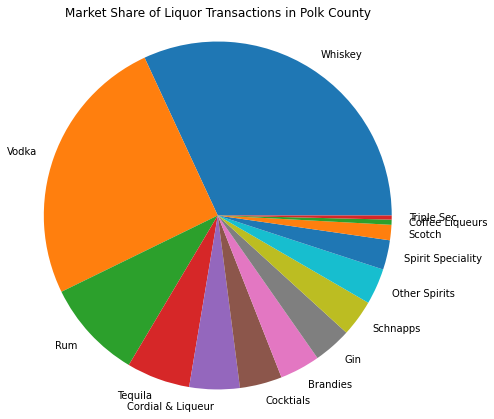

In [26]:
plt.pie(transaction_count['Broad_Category'], labels= transaction_count['index'], radius = 2)
plt.title('Market Share of Liquor Transactions in Polk County', pad = 90)


In [27]:
highest_sales = two_year_span_df.groupby("Broad_Category")['Sale_(Dollars)'].sum().sort_values(ascending = False).reset_index() #finding out which liquor sold the most $$

highest_sales

,Broad_Category,Sale_(Dollars)
0,Whiskey,5613670.27
1,Vodka,3223334.24
2,Tequila,1356611.14
3,Rum,1345484.35
4,Other Spirits,725358.16
5,Spirit Speciality,624848.12
6,Cordial & Liqueur,490716.82
7,Brandies,464856.00
8,Gin,454071.89
9,Cocktials,432924.89


Text(0.5, 1.0, 'Market Share of Liquor Sales in Polk County')

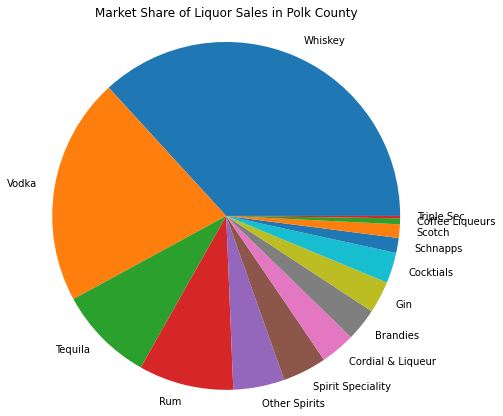

In [28]:
plt.pie(highest_sales['Sale_(Dollars)'], labels= highest_sales['Broad_Category'], radius = 2)
plt.title('Market Share of Liquor Sales in Polk County', pad = 90)


## Creating Dataframes
Focusing analysis on Whiskey sales at Hy-Vee, Walmart, and Sam's Club

In [29]:
narrow_down = two_year_span_df[['Store_Chains', 'Broad_Category', 'State_Bottle_Cost','State_Bottle_Retail','Sale_(Dollars)','Volume_Sold_(Liters)','Gross_Profit', 'Dollars_per_Liter', 'Quarters', 'Month', 'Year']]

narrow_down = narrow_down[(narrow_down['Broad_Category'] == 'Whiskey')]

narrow_down.head()

,Store_Chains,Broad_Category,State_Bottle_Cost,State_Bottle_Retail,Sale_(Dollars),Volume_Sold_(Liters),Gross_Profit,Dollars_per_Liter,Quarters,Month,Year
15621011,Hy-Vee,Whiskey,10.00,15.00,90.00,4.5,30.00,6.67,Q1,1,2020
15621361,Hy-Vee,Whiskey,14.00,21.00,252.00,9.0,84.00,9.33,Q1,1,2020
15621501,Quik Trip,Whiskey,7.35,11.03,22.06,0.1,7.36,73.60,Q1,1,2020
15621687,Kum & Go,Whiskey,10.45,15.68,94.08,10.5,31.38,2.99,Q1,1,2020
15621698,Hy-Vee,Whiskey,9.09,13.64,163.68,9.0,54.60,6.07,Q1,1,2020


### Hy-Vee

In [30]:
hy_vee_df = narrow_down[(narrow_down['Store_Chains'] == 'Hy-Vee')] #Filtering for Hy-Vee stores

hy_vee_df

,Store_Chains,Broad_Category,State_Bottle_Cost,State_Bottle_Retail,Sale_(Dollars),Volume_Sold_(Liters),Gross_Profit,Dollars_per_Liter,Quarters,Month,Year
15621011,Hy-Vee,Whiskey,10.00,15.00,90.00,4.50,30.00,6.67,Q1,1,2020
15621361,Hy-Vee,Whiskey,14.00,21.00,252.00,9.00,84.00,9.33,Q1,1,2020
15621698,Hy-Vee,Whiskey,9.09,13.64,163.68,9.00,54.60,6.07,Q1,1,2020
15621990,Hy-Vee,Whiskey,5.40,8.10,8.10,0.05,2.70,54.00,Q1,1,2020
15622534,Hy-Vee,Whiskey,24.50,36.75,220.50,4.50,73.50,16.33,Q1,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
21865422,Hy-Vee,Whiskey,8.00,12.00,144.00,9.00,48.00,5.33,Q4,10,2020
21865648,Hy-Vee,Whiskey,8.98,13.47,323.28,18.00,107.76,5.99,Q4,10,2020
21865911,Hy-Vee,Whiskey,18.89,28.34,680.16,24.00,226.80,9.45,Q4,10,2020
21866325,Hy-Vee,Whiskey,5.00,7.50,180.00,1.20,60.00,50.00,Q4,10,2020


In [31]:
h_grouping_quarters = hy_vee_df.groupby(['Year', 'Quarters'])['Dollars_per_Liter'].mean().round(2).reset_index()     #df finding gross profit per liter for each quarter per year

In [32]:
h_quarters_2020 = h_grouping_quarters[(h_grouping_quarters['Year'] == 2020)]

h_quarters_2020

,Year,Quarters,Dollars_per_Liter
0,2020,Q1,21.23
1,2020,Q2,25.57
2,2020,Q3,28.99
3,2020,Q4,29.46


In [33]:
h_quarters_2021 = h_grouping_quarters[(h_grouping_quarters['Year'] == 2021)]

h_quarters_2021


,Year,Quarters,Dollars_per_Liter
4,2021,Q1,26.27
5,2021,Q2,33.07
6,2021,Q3,25.51
7,2021,Q4,28.49


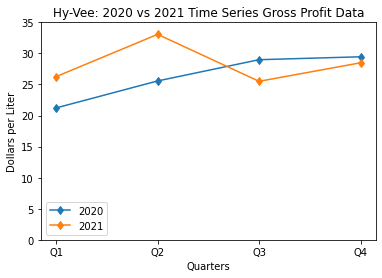

In [34]:
plt.plot(h_quarters_2020['Quarters'], h_quarters_2020['Dollars_per_Liter'], label = "2020", linestyle="-", marker = 'd')     #comparing gross profit changes across years 
plt.plot(h_quarters_2021['Quarters'], h_quarters_2021['Dollars_per_Liter'], label = "2021", linestyle="-", marker = 'd')
plt.legend()
plt.title('Hy-Vee: 2020 vs 2021 Time Series Gross Profit Data')
plt.xlabel("Quarters")
plt.ylabel("Dollars per Liter")
plt.ylim(0,35)
plt.show()

In [35]:
h_grouping_volume = hy_vee_df.groupby(['Year', 'Quarters'])['Volume_Sold_(Liters)'].sum().round(2).reset_index()     #df finding gross profit for each quarter per year

In [36]:
h_volume_2020 = h_grouping_volume[(h_grouping_volume['Year'] == 2020)]

In [37]:
h_volume_2021 = h_grouping_volume[(h_grouping_volume['Year'] == 2021)]

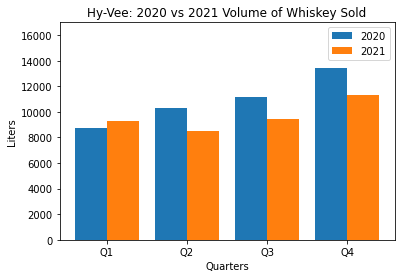

In [38]:
#create a bar graph showing liters sold per quarter

h_volume_list = h_grouping_volume.values.tolist()
 
flat_list = []                                              #flattening the list of lists
for sublist in h_volume_list:
    for item in sublist:
        flat_list.append(item)

idx = 2
highest_idx = len(flat_list)

flat_list2 = []
while idx <= highest_idx:
    flat_list2.append(flat_list[idx])
    idx = idx + 3
  

h_twenty20 = flat_list2[0:4]                                 #slicing the list into 2020 and 2021                 
h_twenty21 = flat_list2[4:]


X = ['Q1', 'Q2','Q3','Q4']                                    #X axis titles

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, h_twenty20, 0.4, label = '2020')
plt.bar(X_axis + 0.2, h_twenty21, 0.4, label = '2021')
  
plt.xticks(X_axis, X)
plt.xlabel("Quarters")
plt.ylabel("Liters")
plt.title("Hy-Vee: 2020 vs 2021 Volume of Whiskey Sold")
plt.legend()
plt.ylim(0,17000)
plt.show()

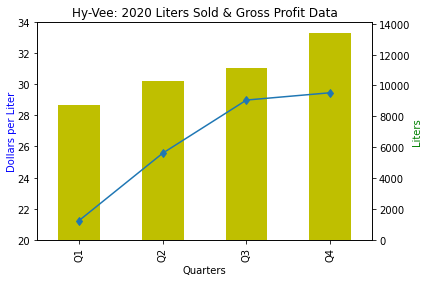

In [39]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

h_volume_2020['Volume_Sold_(Liters)'].plot(kind='bar', color='y', ax=ax1)       # comparing the gross profit with volume sold 2020
h_quarters_2020['Dollars_per_Liter'].plot(kind='line', marker='d', ax=ax2)
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

ax1.set_xlabel('Quarters')
ax1.set_ylabel('Dollars per Liter', color='b',  labelpad=20)
ax2.set_ylabel('Liters', color='g',  labelpad=40)
plt.title('Hy-Vee: 2020 Liters Sold & Gross Profit Data')

ax1.set_xticklabels(h_volume_2020['Quarters'])

plt.ylim(20,34)

plt.show()

In [40]:
h_quarters_2021.set_index("Quarters", inplace=True)

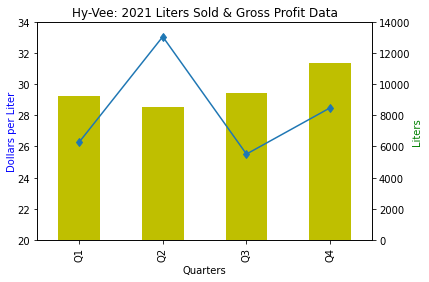

In [41]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

h_volume_2021['Volume_Sold_(Liters)'].plot(kind='bar', color='y', ax=ax1)
h_quarters_2021['Dollars_per_Liter'].plot(kind='line', marker='d', ax=ax2, x = 'Quarters')   #comparing gross profit with volume sold 2021
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

ax1.set_xlabel('Quarters')
ax1.set_ylabel('Dollars per Liter', color='b',  labelpad=20)
ax2.set_ylabel('Liters', color='g',  labelpad= 40)
plt.title('Hy-Vee: 2021 Liters Sold & Gross Profit Data')

plt.ylim(20,34)
ax1.set_ylim(0, 14000)

plt.show()

### Walmart

In [42]:
walmart_df = narrow_down[(narrow_down['Store_Chains'] == 'Wal-Mart')] #filtering for Walmart stores

In [43]:
w_grouping_quarters = walmart_df.groupby(['Year', 'Quarters'])['Dollars_per_Liter'].mean().round(2).reset_index()     #df finding gross profit per transaction for each quarter per year
w_grouping_quarters

,Year,Quarters,Dollars_per_Liter
0,2020,Q1,6.54
1,2020,Q2,7.37
2,2020,Q3,11.44
3,2020,Q4,6.78
4,2021,Q1,8.82
5,2021,Q2,7.82
6,2021,Q3,7.02
7,2021,Q4,8.04


In [44]:
w_quarters_2020 = w_grouping_quarters[(w_grouping_quarters['Year'] == 2020)]

In [45]:
w_quarters_2021 = w_grouping_quarters[(w_grouping_quarters['Year'] == 2021)]

w_quarters_2021

,Year,Quarters,Dollars_per_Liter
4,2021,Q1,8.82
5,2021,Q2,7.82
6,2021,Q3,7.02
7,2021,Q4,8.04


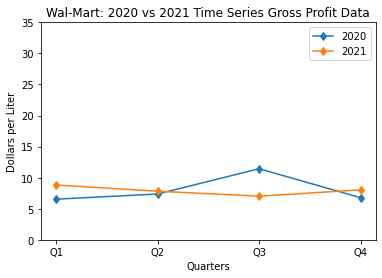

In [46]:
plt.plot(w_quarters_2020['Quarters'], w_quarters_2020['Dollars_per_Liter'], label = "2020", linestyle="-", marker = 'd')     #comparing gross profit changes across years 
plt.plot(w_quarters_2021['Quarters'], w_quarters_2021['Dollars_per_Liter'], label = "2021", linestyle="-", marker = 'd')
plt.legend()
plt.title('Wal-Mart: 2020 vs 2021 Time Series Gross Profit Data')
plt.xlabel("Quarters")
plt.ylabel("Dollars per Liter")
plt.ylim(0,35)
plt.show()


In [47]:
w_grouping_volume = walmart_df.groupby(['Year', 'Quarters'])['Volume_Sold_(Liters)'].sum().round(2).reset_index()     #df finding gross profit for each quarter per year
w_grouping_volume

,Year,Quarters,Volume_Sold_(Liters)
0,2020,Q1,1065.00
1,2020,Q2,1261.70
2,2020,Q3,1044.25
3,2020,Q4,1164.10
4,2021,Q1,1644.60
5,2021,Q2,1244.70
6,2021,Q3,1357.60
7,2021,Q4,1673.40


In [48]:
w_volume_2020 = w_grouping_volume[(w_grouping_volume['Year'] == 2020)]

In [49]:
w_volume_2021 = w_grouping_volume[(w_grouping_volume['Year'] == 2021)]
w_volume_2021

,Year,Quarters,Volume_Sold_(Liters)
4,2021,Q1,1644.6
5,2021,Q2,1244.7
6,2021,Q3,1357.6
7,2021,Q4,1673.4


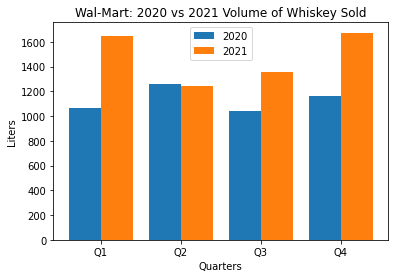

In [50]:
#create a bar graph showing liters sold per quarter

w_volume_list = w_grouping_volume.values.tolist()
 
flat_list3 = []                                              #flattening the list of lists
for sublist1 in w_volume_list:
    for item in sublist1:
        flat_list3.append(item)

idx = 2
highest_idx1 = len(flat_list3)

flat_list4 = []
while idx <= highest_idx1:
    flat_list4.append(flat_list3[idx])
    idx = idx + 3
  

w_twenty20 = flat_list4[0:4]                                 #slicing the list into 2020 and 2021               
w_twenty21 = flat_list4[4:]


X1 = ['Q1', 'Q2','Q3','Q4']                                    #X axis titles

X_axis1 = np.arange(len(X1))
  
plt.bar(X_axis1 - 0.2, w_twenty20, 0.4, label = '2020')
plt.bar(X_axis1 + 0.2, w_twenty21, 0.4, label = '2021')
  
plt.xticks(X_axis1, X1)
plt.xlabel("Quarters")
plt.ylabel("Liters")
plt.title("Wal-Mart: 2020 vs 2021 Volume of Whiskey Sold")
plt.legend()

plt.show()

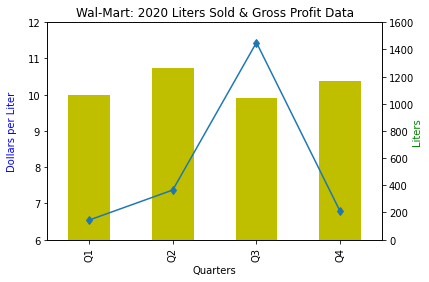

In [51]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

w_volume_2020['Volume_Sold_(Liters)'].plot(kind='bar', color='y', ax=ax1)       # comparing the gross profit with volume sold 2020
w_quarters_2020['Dollars_per_Liter'].plot(kind='line', marker='d', ax=ax2)
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

ax1.set_xlabel('Quarters')
ax1.set_ylabel('Dollars per Liter', color='b',  labelpad=30)
ax2.set_ylabel('Liters', color='g',  labelpad=30)
plt.title('Wal-Mart: 2020 Liters Sold & Gross Profit Data')

ax1.set_xticklabels(w_volume_2020['Quarters'])

ax1.set_ylim(0, 1600)
plt.ylim(6,12)
plt.show()

In [52]:
w_quarters_2021.set_index("Quarters", inplace=True)

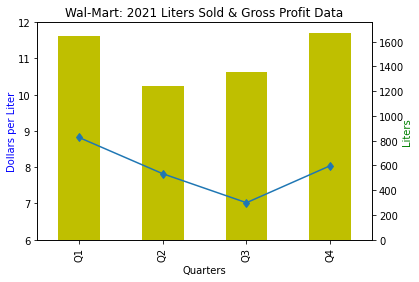

In [53]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

w_volume_2021['Volume_Sold_(Liters)'].plot(kind='bar', color='y', ax=ax1)
w_quarters_2021['Dollars_per_Liter'].plot(kind='line', marker='d', ax=ax2, x = 'Quarters')   #comparing gross profit with volume sold 2021
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

ax1.set_xlabel('Quarters')
ax1.set_ylabel('Dollars per Liter', color='b',  labelpad=20)
ax2.set_ylabel('Liters', color='g',  labelpad=30)
plt.title('Wal-Mart: 2021 Liters Sold & Gross Profit Data')

plt.ylim(6,12)
plt.show()

### Target

In [54]:
target_df = narrow_down[(narrow_down['Store_Chains'] == "Target")]

In [55]:
target_df

,Store_Chains,Broad_Category,State_Bottle_Cost,State_Bottle_Retail,Sale_(Dollars),Volume_Sold_(Liters),Gross_Profit,Dollars_per_Liter,Quarters,Month,Year
15623813,Target,Whiskey,14.00,21.00,252.00,9.0,84.00,9.33,Q1,1,2020
15625456,Target,Whiskey,18.49,27.74,332.88,9.0,111.00,12.33,Q1,1,2020
15627721,Target,Whiskey,22.49,33.74,404.88,9.0,135.00,15.00,Q1,1,2020
15629848,Target,Whiskey,17.00,25.50,306.00,9.0,102.00,11.33,Q1,1,2020
15629925,Target,Whiskey,19.67,29.51,177.06,4.5,59.04,13.12,Q1,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
21853654,Target,Whiskey,32.48,48.72,292.32,10.5,97.44,9.28,Q4,10,2020
21854232,Target,Whiskey,9.00,13.50,162.00,9.0,54.00,6.00,Q4,10,2020
21855510,Target,Whiskey,16.49,24.74,148.44,4.5,49.50,11.00,Q4,10,2020
21859706,Target,Whiskey,12.96,19.44,116.64,10.5,38.88,3.70,Q4,10,2020


In [56]:
t_grouping_quarters = target_df.groupby(['Year', 'Quarters'])['Dollars_per_Liter'].mean().round(2).reset_index()     #df finding gross profit per liter for each quarter per year

In [57]:
t_quarters_2020 = t_grouping_quarters[(t_grouping_quarters['Year'] == 2020)]

In [58]:
t_quarters_2021 = t_grouping_quarters[(t_grouping_quarters['Year'] == 2021)]

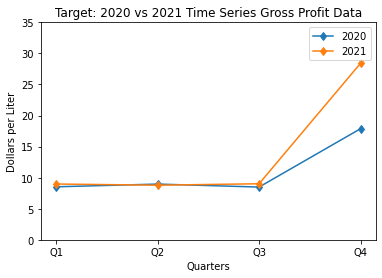

In [59]:
plt.plot(t_quarters_2020['Quarters'], t_quarters_2020['Dollars_per_Liter'], label = "2020", linestyle="-", marker = 'd')     #comparing gross profit changes across years 
plt.plot(t_quarters_2021['Quarters'], t_quarters_2021['Dollars_per_Liter'], label = "2021", linestyle="-", marker = 'd')
plt.legend()
plt.title('Target: 2020 vs 2021 Time Series Gross Profit Data')
plt.xlabel("Quarters")
plt.ylabel("Dollars per Liter")
plt.ylim(0,35)
plt.show()

In [60]:
t_grouping_volume = target_df.groupby(['Year', 'Quarters'])['Volume_Sold_(Liters)'].sum().round(2).reset_index()     #df finding how many liters of whiskey is sold for each quarter per year

In [61]:
t_volume_2020 = t_grouping_volume[(t_grouping_volume['Year'] == 2020)]

In [62]:
t_volume_2021 = t_grouping_volume[(t_grouping_volume['Year'] == 2021)]

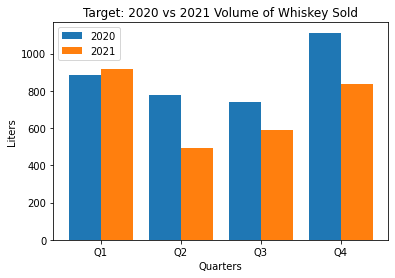

In [63]:
#create a bar graph showing liters sold per quarter

t_volume_list = t_grouping_volume.values.tolist()
 
flat_list5 = []                                              #flattening the list of lists
for sublist in t_volume_list:
    for item in sublist:
        flat_list5.append(item)

idx = 2
highest_idx2 = len(flat_list5)

flat_list6 = []
while idx <= highest_idx2:
    flat_list6.append(flat_list5[idx])
    idx = idx + 3
  

t_twenty20 = flat_list6[0:4]                                 #slicing the list into 2020 and 2021                
t_twenty21 = flat_list6[4:]


X2 = ['Q1', 'Q2','Q3','Q4']                                    #X axis titles

X_axis2 = np.arange(len(X2))
 
plt.bar(X_axis2 - 0.2, t_twenty20, 0.4, label = '2020')
plt.bar(X_axis2 + 0.2, t_twenty21, 0.4, label = '2021')
  
plt.xticks(X_axis2, X2)
plt.xlabel("Quarters")
plt.ylabel("Liters")
plt.title("Target: 2020 vs 2021 Volume of Whiskey Sold")
plt.legend()
plt.show()

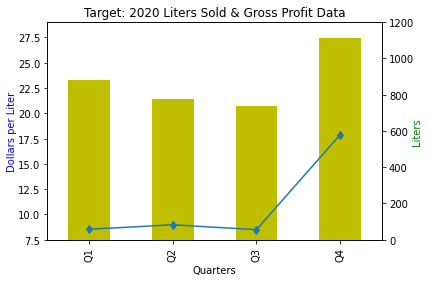

In [64]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

t_volume_2020['Volume_Sold_(Liters)'].plot(kind='bar', color='y', ax=ax1)       # comparing the gross profit with volume sold 2020
t_quarters_2020['Dollars_per_Liter'].plot(kind='line', marker='d', ax=ax2)
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

ax1.set_xlabel('Quarters')
ax1.set_ylabel('Dollars per Liter', color='b',  labelpad=30)
ax2.set_ylabel('Liters', color='g',  labelpad=30)
plt.title('Target: 2020 Liters Sold & Gross Profit Data')

ax1.set_xticklabels(t_volume_2020['Quarters'])
plt.ylim(7.5,29)
ax1.set_ylim(0, 1200)
plt.show()

In [65]:
t_quarters_2021.set_index("Quarters", inplace=True)

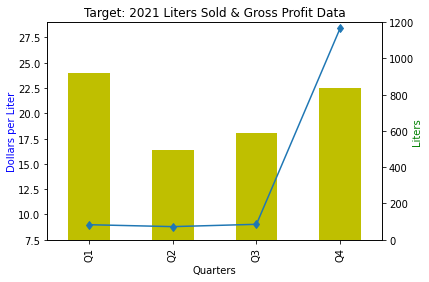

In [66]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

t_volume_2021['Volume_Sold_(Liters)'].plot(kind='bar', color='y', ax=ax1)
t_quarters_2021['Dollars_per_Liter'].plot(kind='line', marker='d', ax=ax2, x = 'Quarters')   #comparing gross profit with volume sold 2021
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

ax1.set_xlabel('Quarters')
ax1.set_ylabel('Dollars per Liter', color='b',  labelpad=30)
ax2.set_ylabel('Liters', color='g',  labelpad=30)
plt.title('Target: 2021 Liters Sold & Gross Profit Data')

ax1.set_ylim(0, 1200)
plt.ylim(7.5,29)
plt.show()

## Comparing different stores

In [67]:
all_three = narrow_down[(narrow_down['Store_Chains'] =='Hy-Vee') | (narrow_down['Store_Chains'] == 'Wal-Mart') | (narrow_down['Store_Chains'] == 'Target')]

all_three.head()


,Store_Chains,Broad_Category,State_Bottle_Cost,State_Bottle_Retail,Sale_(Dollars),Volume_Sold_(Liters),Gross_Profit,Dollars_per_Liter,Quarters,Month,Year
15621011,Hy-Vee,Whiskey,10.00,15.00,90.00,4.50,30.0,6.67,Q1,1,2020
15621361,Hy-Vee,Whiskey,14.00,21.00,252.00,9.00,84.0,9.33,Q1,1,2020
15621698,Hy-Vee,Whiskey,9.09,13.64,163.68,9.00,54.6,6.07,Q1,1,2020
15621990,Hy-Vee,Whiskey,5.40,8.10,8.10,0.05,2.7,54.00,Q1,1,2020
15622534,Hy-Vee,Whiskey,24.50,36.75,220.50,4.50,73.5,16.33,Q1,1,2020


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


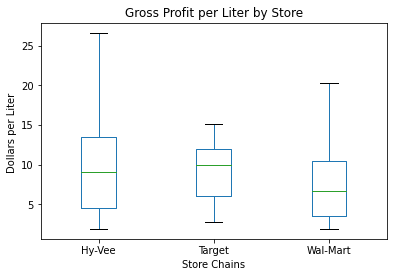

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


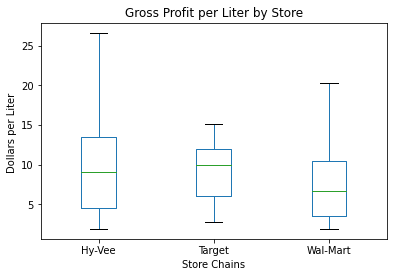

In [68]:
all_three.boxplot(by = 'Store_Chains', column = 'Dollars_per_Liter', showfliers = False) #excluding outliers, gross profit per liter by store

plt.title('Gross Profit per Liter by Store')
plt.xlabel('Store Chains')
plt.ylabel('Dollars per Liter ')
plt.suptitle('')

plt.grid(None)